# K-Means: Limitations

In this notebook we study the limitations of the K-Means clustering algorithm.


We give at least **three limitations** of K-Means.

- Limitation 1: K-means requires us to specify the number of clusters a priory.

- Limitation 2: K-Means is sensitive towards outlier. Outliers can skew the clusters in K-Means in very large extent.

- Limitation 3: K-Means forms spherical clusters only. It fails when data is not spherical (e.g., oblong or elliptical) or of arbitrary shape.

Previously we discussed how to address the first limitation, i.e., how to find the optimal number of clusters.

In this notebook we demonstrate the third limitation, i.e., K-means fails to cluster non-spherical data.

We consider two types of data distrubution for this demonstration:
- Oblong or Ellitical Shape Data
- Arbitrary Shape data

In this notebook, we use **oblong or elliptical** shape data.

#### Why does K-Means algorithm fail to cluster data that has oblong or elliptical shape clusters?

The main limitation of K-Means for its failure to account for non-spherical distribution is that it **does not account for variance in data**. 

Variance refers to the width of the bell shaped curve. In two dimensions, variance (covariance to be exact) determines the **shape of the distribution**.

<img src="https://cse.unl.edu/~hasan/Pics/Variance-2D.png" width=600, height=300>

Given a dataset, the K-Means model works by placing a circle (or, in higher dimensions, a hypersphere) at the center of each cluster, with a radius defined by the most distant point in the cluster. 

<img src="https://cse.unl.edu/~hasan/Pics/K-Means-Circles.png" width=500, height=300>

This works fine as long as our data is circular. However, when our data takes on different shape (such as oblong clusters), K-Means fails.



In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

## Synthetic Dataset

We will use Scikit-Learn's "make_blobs" function to generate **isotropic Gaussian blobs** for clustering. 

This function provides greater control regarding the centers and standard deviations of each cluster.
 

The following parameters are used by the make_blobs function:

 
- n_samples : int or array-like, optional (default=100)
        
        If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

- n_features : int, optional (default=2)

        The number of features for each sample.

- centers : int or array of shape [n_centers, n_features], optional (default=None) 

        The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

- cluster_std : float or sequence of floats, optional (default=1.0)

    The standard deviation of the clusters.

- center_box : pair of floats (min, max), optional (default=(-10.0, 10.0))

    The bounding box for each cluster center when centers are generated at random.

- shuffle : boolean, optional (default=True)

    Shuffle the samples.
    

- random_state : int, RandomState instance or None (default)

        Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls. See Glossary.
        
        
The function returns the following parameters:      

- X : array of shape [n_samples, n_features]

        The generated samples.

- y : array of shape [n_samples]

        The integer labels for cluster membership of each sample.

## Create Oblong or Elliptic Shape Clusters and Visualiize 

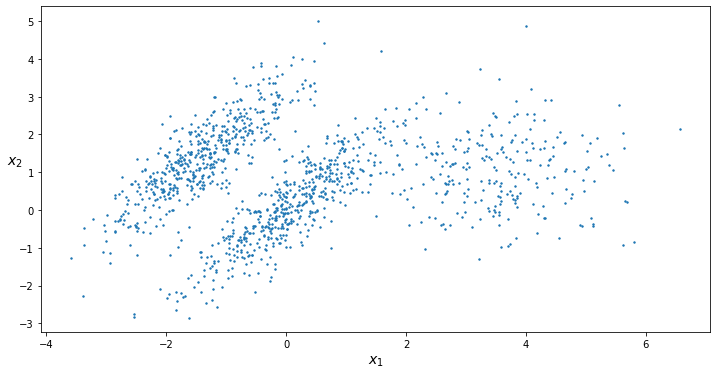

In [2]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]


plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=None, s=2, cmap='autumn')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.show()

## Find optimal  𝑘  


First we need to find optimal $k$ (number of clusters).

To do this we use the plot of Silhouette score vs $k$.

The silhouette score is the mean silhouette coefficient over all the instances. 

An instance's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). 

The silhouette coefficient can vary between -1 and +1: 
- A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters.
- A coefficient close to 0 means that it is close to a cluster boundary.
- A coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of $k$.

We use the silhouette_score method, which uses the following parameters:

- X : feature array.

- labels : Predicted labels for each sample.

- metric : string, or callable

        The metric to use when calculating distance between instances in a feature array. For example, "manhattan", "euclidean".

C:\Users\mxj210016\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


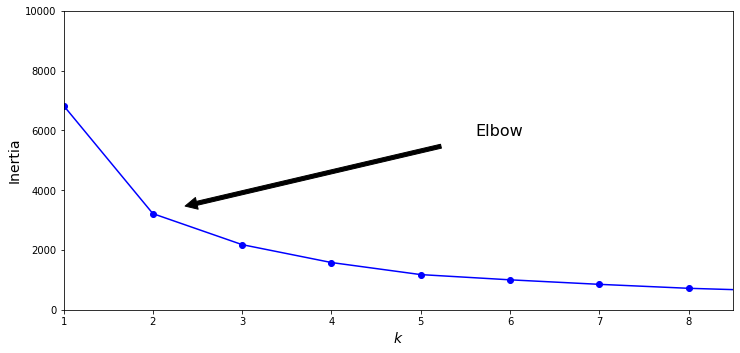

In [25]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]


plt.figure(figsize=(12, 5.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 10000])
plt.show()

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]



silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(10, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

## Observation

We see that the optimal choice for $k$ is 2, which does not match with the number of clusters in our data.

## K-Means

We apply the K-Means algorithm to identify the **3 distinct clusters**. 

We set the value of k to 3.

In [4]:
# Number of clusters
k = 3

# Train the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42, verbose=1, n_jobs=-1)
kmeans.fit(X)

Initialization complete
Iteration 0, inertia 3966.2683369352635
Iteration 1, inertia 2378.9708445982174
Iteration 2, inertia 2195.2229891644793
Iteration 3, inertia 2181.6234810905526
Iteration 4, inertia 2179.646424039973
Iteration 5, inertia 2179.5022566236935
Converged at iteration 5: center shift 3.6285040591545244e-05 within tolerance 0.0002732132474543051.
Initialization complete
Iteration 0, inertia 2508.3070772026217
Iteration 1, inertia 2454.5683820476756
Iteration 2, inertia 2417.9489040039966
Iteration 3, inertia 2347.6069670004254
Iteration 4, inertia 2279.8746284733984
Iteration 5, inertia 2234.058659030124
Iteration 6, inertia 2203.1969576141228
Iteration 7, inertia 2189.804266325218
Iteration 8, inertia 2183.84760666626
Iteration 9, inertia 2180.9286126412185
Iteration 10, inertia 2180.149032489143
Iteration 11, inertia 2179.8058104108472
Converged at iteration 11: center shift 0.00012974354240422256 within tolerance 0.0002732132474543051.
Initialization complete
Iterati

C:\Users\mxj210016\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1, random_state=42, verbose=1)

## Plotting Decision Boundary 


To better understand how K-Means performs, we need to **<font color=red size=6> visualize the decision boundary </font>**.


Following functions are used to plot the decision boundary. 

In [5]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=5)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

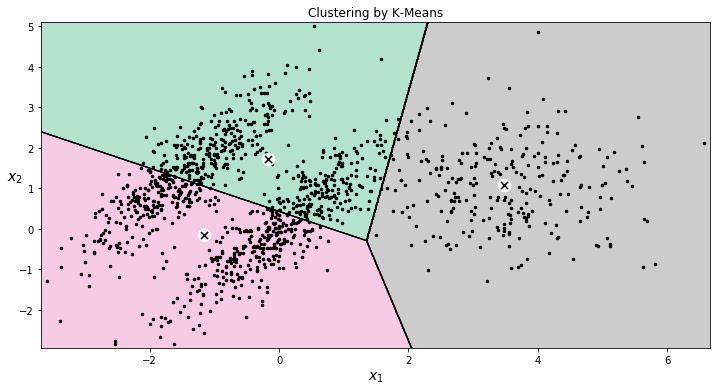

In [6]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by K-Means")
plot_decision_boundaries(kmeans, X)
plt.show()

## Observation

We see that although the dataset contains three distinct clusters, the K-Means algorithm is unable to identify those.

In a future notebook we will see that the **Gaussian Mixture Model (GMM)** clustering method is able to identify clusters with elliptical shape.

In [6]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

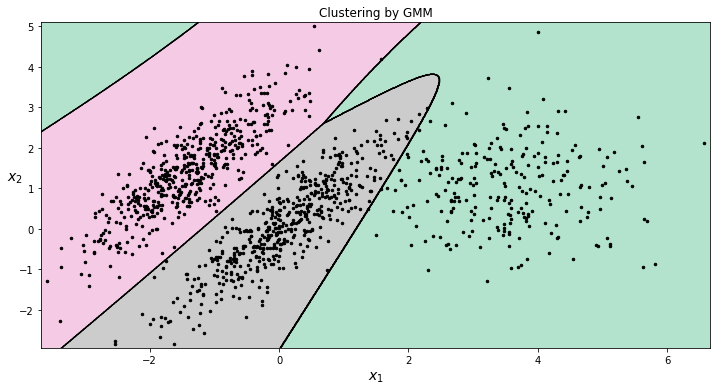

In [7]:
plt.figure(figsize=(12, 6))
plt.title("Clustering by GMM")
plot_decision_boundaries(gm, X, show_centroids=False)
plt.show()